In [200]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geoplot as gplt
import geopandas as gpd
import numpy as np
from numpy import *
sns.set()

In [2]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
#current path : /home/anmol/python/github/covid_jhu/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports
path_to_directory=input('Path to the directory ')

Path to the directory /home/anmol/python/github/covid_jhu/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports


In [199]:
def dbs(path_to_directory):
    dicts={}
    ls=os.listdir(path_to_directory)
    ls.sort()
    for j in ls:
        if j.endswith('.csv'):
            reports=pd.read_csv(path_to_directory+'/'+j)
            reports=reports.replace('US','United States of America')
            confirmed={}
            deaths={}
            recovered={}
            try:
                for i in reports['Country_Region'].unique():
                    a=reports[reports['Country_Region']==i]['Confirmed'].sum()
                    b=reports[reports['Country_Region']==i]['Deaths'].sum()
                    c=reports[reports['Country_Region']==i]['Recovered'].sum()
                    confirmed[i]=a
                    deaths[i]=b    
                    recovered[i]=c  
                a=pd.DataFrame.from_dict(confirmed,orient='index',columns=['Confirmed cases'])
                b=pd.DataFrame.from_dict(deaths,orient='index',columns=['Deaths'])
                c=pd.DataFrame.from_dict(recovered,orient='index',columns=['Recovered'])
                d=pd.concat([a,b,c],axis=1)
                dicts[j]=d
            except:
                continue
    return(dicts)

#+========================================+
#| index | confirmed | deaths | recovered | 
#+========================================+ 
# structure of db ^^^^^

def graphs(db):

    holder=db    
    merged=world.merge(holder.reset_index(),left_on='name',right_on='index')
    #plotting Subplots
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(30,10))
    merged.plot(ax=ax1, column='Confirmed cases',legend=True, legend_kwds={
        'label':'Confirmed cases',
        'orientation':'horizontal'})
    merged.plot(ax=ax2, column='Deaths',legend=True, legend_kwds={
        'label':'Deaths',
        'orientation':'horizontal'})
    merged.plot(ax=ax3, column='Recovered',legend=True, legend_kwds={
        'label':'Recovered',
        'orientation':'horizontal'})
    plt.rcParams.update({'figure.max_open_warning': 0})
    return ()


def time_lapse(confirmed,deaths,recovered):
    #plot country-wise graph
    plt.figure(figsize=(20,10))
    plt.plot(confirmed[country],label='confirmed')
    plt.plot(recovered[country],label='recovered')
    plt.plot(deaths[country],label='deaths')
    plt.tick_params(labelrotation=90)
    plt.legend()
    return()

def new_cases(confirmed,deaths,recovered):
    variables=[confirmed,deaths,recovered]
    labels=['confirmed','deaths','recovered']
    plt.figure(figsize=(20,10))
    for variable,label in zip(variables,labels):
        holder=[]
        for idx,i in enumerate(variable[country]):
            holder.append(variable[country][idx]-variable[country][idx-1])
        container={}
        for i,j in zip(variable[country].index[1:],holder[1:]):
            container[i]=j
        to_plt=pd.DataFrame.from_dict(container,orient='index',columns=[label])
        plt.plot(to_plt,label=label)
        plt.tick_params(labelrotation=90)
        plt.legend()

In [ ]:
db=dbs(path_to_directory)

In [196]:
db.keys()

dict_keys(['03-22-2020.csv', '03-23-2020.csv', '03-24-2020.csv', '03-25-2020.csv', '03-26-2020.csv', '03-27-2020.csv', '03-28-2020.csv', '03-29-2020.csv', '03-30-2020.csv', '03-31-2020.csv', '04-01-2020.csv', '04-02-2020.csv', '04-03-2020.csv', '04-04-2020.csv', '04-05-2020.csv', '04-06-2020.csv', '04-07-2020.csv', '04-08-2020.csv', '04-09-2020.csv', '04-10-2020.csv', '04-11-2020.csv', '04-12-2020.csv', '04-13-2020.csv', '04-14-2020.csv', '04-15-2020.csv', '04-16-2020.csv', '04-17-2020.csv', '04-18-2020.csv', '04-19-2020.csv', '04-20-2020.csv', '04-21-2020.csv', '04-22-2020.csv', '04-23-2020.csv', '04-24-2020.csv', '04-25-2020.csv', '04-26-2020.csv', '04-27-2020.csv', '04-28-2020.csv', '04-29-2020.csv', '04-30-2020.csv', '05-01-2020.csv', '05-02-2020.csv', '05-03-2020.csv', '05-04-2020.csv', '05-05-2020.csv', '05-06-2020.csv', '05-07-2020.csv', '05-08-2020.csv', '05-09-2020.csv', '05-10-2020.csv', '05-11-2020.csv', '05-12-2020.csv', '05-13-2020.csv', '05-14-2020.csv', '05-15-2020.csv',

()

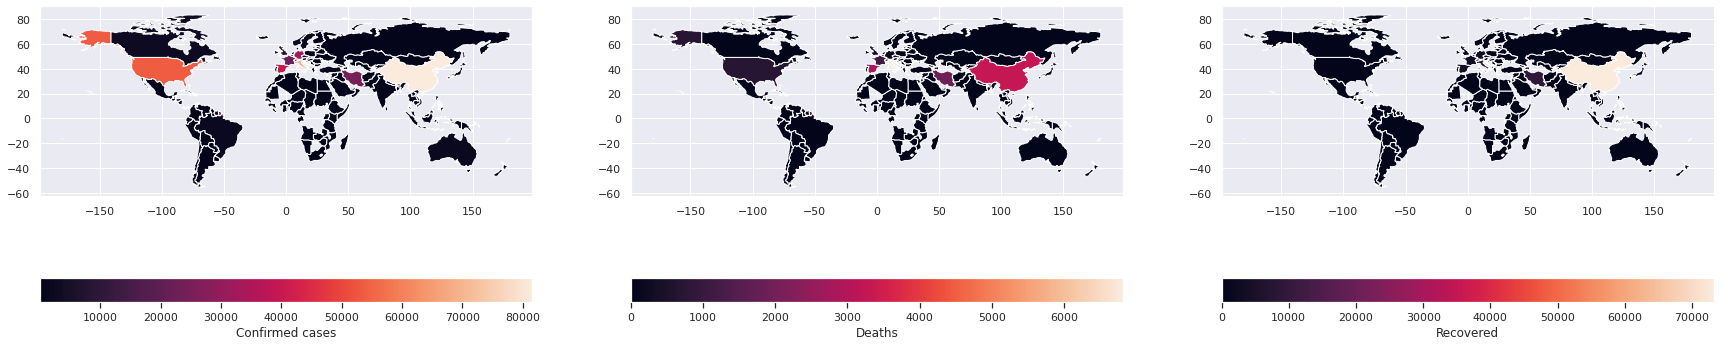

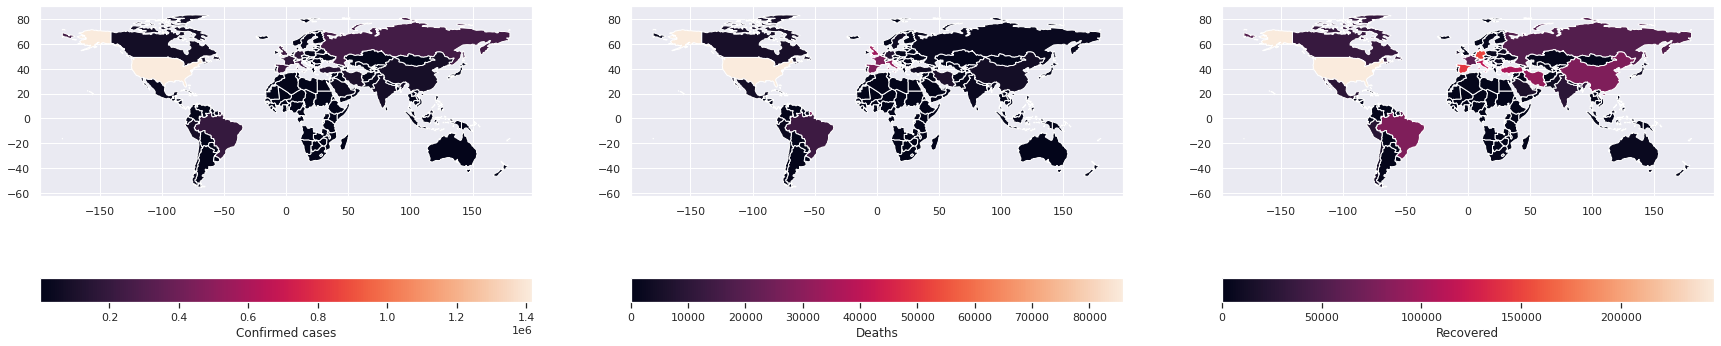

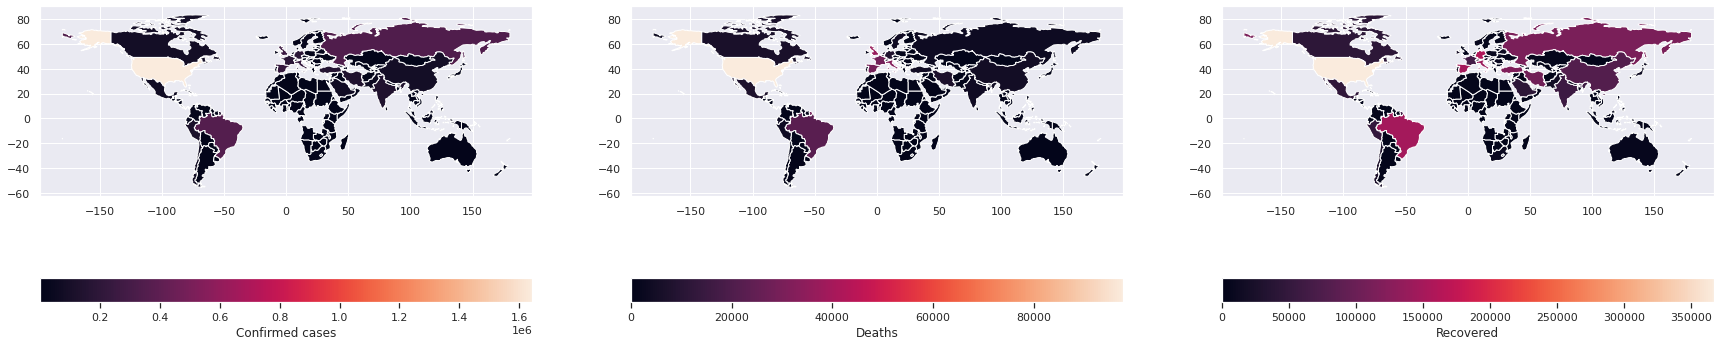

In [201]:
#+========================================+
#| index | confirmed | deaths | recovered | 
#+========================================+ 
# structure of db ^^^^^
graphs(db['03-24-2020.csv'])
graphs(db['05-14-2020.csv'])
graphs(db['05-24-2020.csv'])

In [176]:
#changing total cases according to region / country
db=dbs(path_to_directory) #create db for graphs
country='India' #change the country to see different results

#initializing empty dataframes for capturing transposed information
confirmed=pd.DataFrame([])
deaths=pd.DataFrame([])
recovered=pd.DataFrame([])

#loop through the original data for each date for capruting
for i in db.keys():
    confirmed=confirmed.append(db[i].transpose().loc['Confirmed cases'].rename(index=i[:-4]))  
    deaths=deaths.append(db[i].transpose().loc['Deaths'].rename(index=i[:-4]))        
    recovered=recovered.append(db[i].transpose().loc['Recovered'].rename(index=i[:-4]))

In [204]:
print(list(confirmed.columns))
country=input('Name a country from above: \n') #change the country to see different results

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jor

()

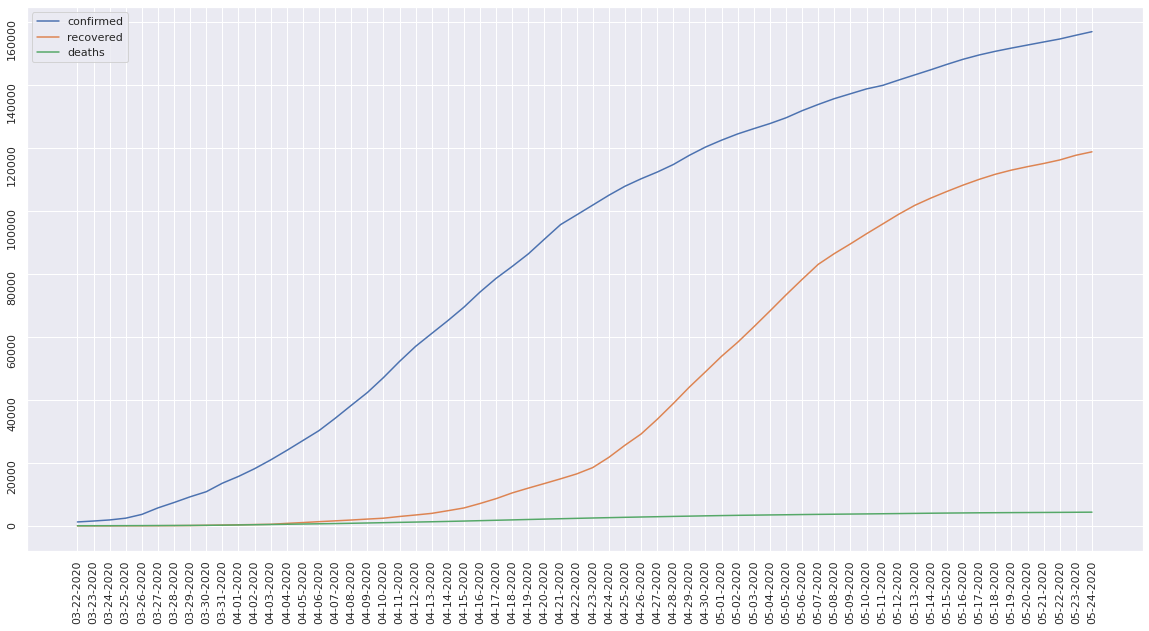

In [205]:
time_lapse(confirmed,deaths,recovered)

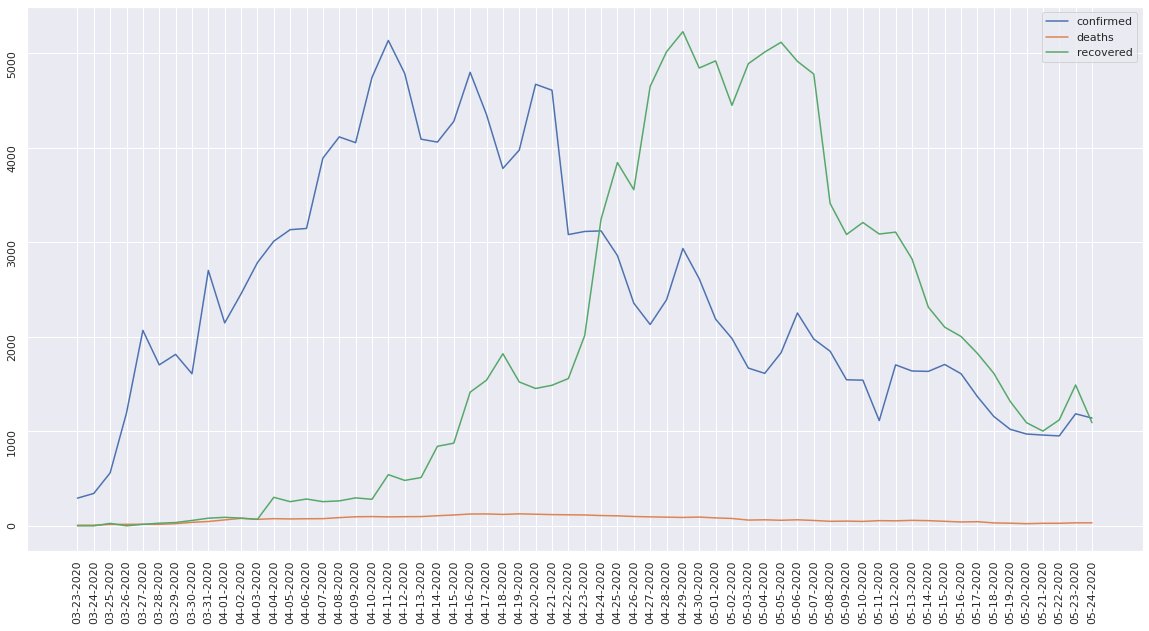

In [206]:
new_cases(confirmed,deaths,recovered)

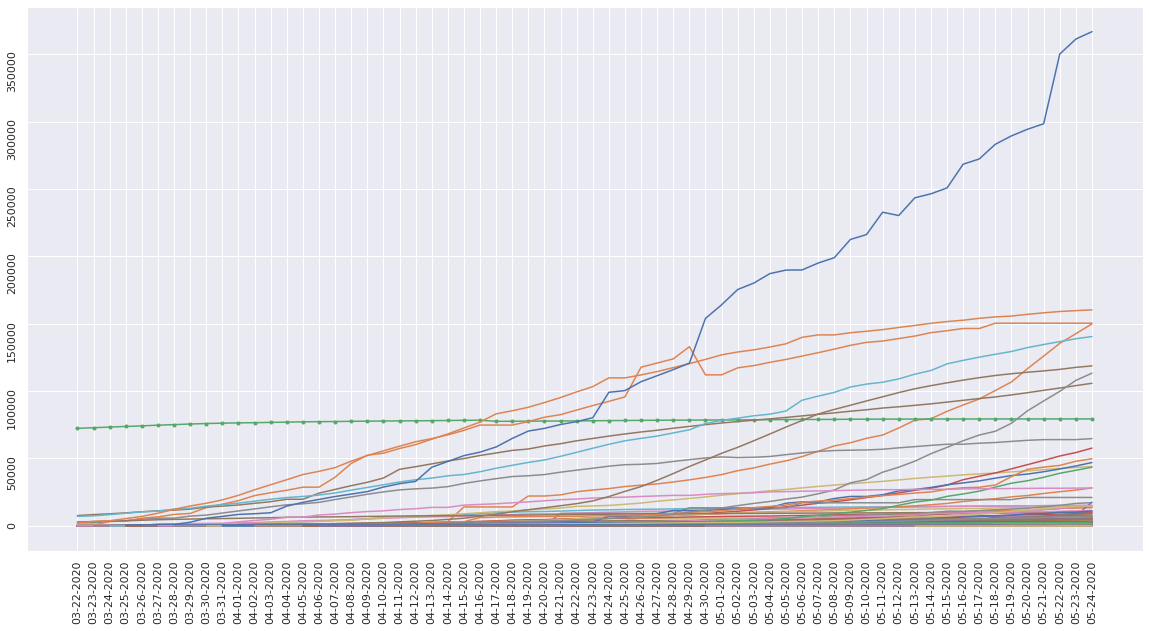

In [221]:
plt.figure(figsize=(20,10))
for x in recovered:
    if x == 'China':
        plt.plot(recovered[x],marker='.')
    else:
        plt.plot(recovered[x],label=x)
#plt.legend()
plt.tick_params(labelrotation=90)

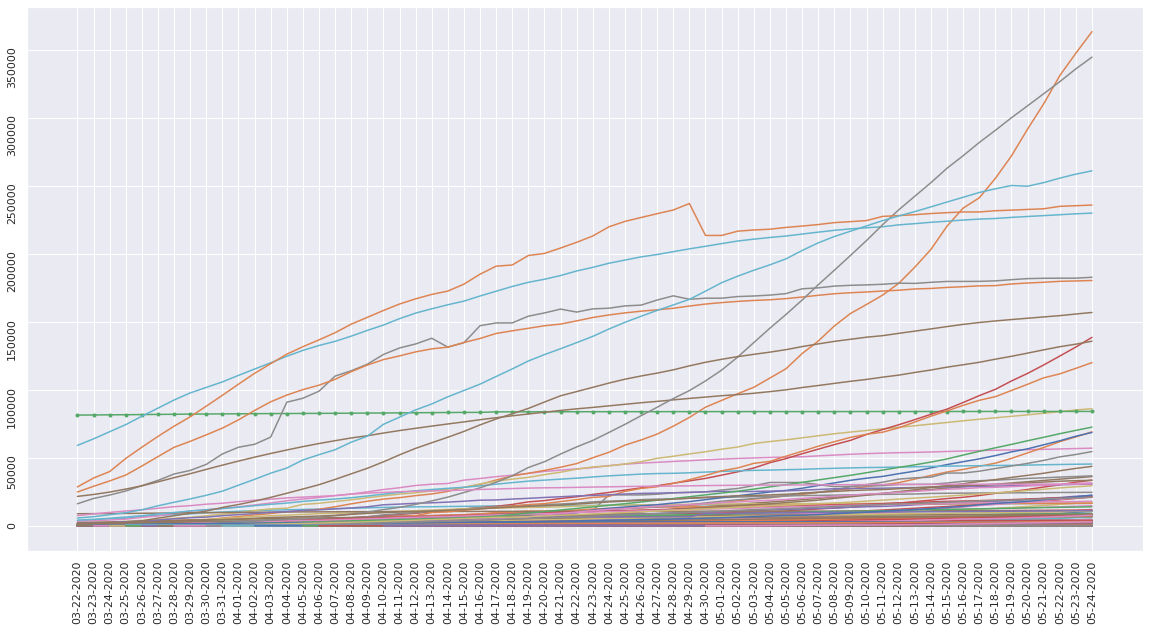

In [224]:
plt.figure(figsize=(20,10))
for x in confirmed:
    if x == 'China':
        plt.plot(confirmed[x],marker='.')
    else:
        plt.plot(confirmed[x],label=x)
#plt.legend()
plt.tick_params(labelrotation=90)

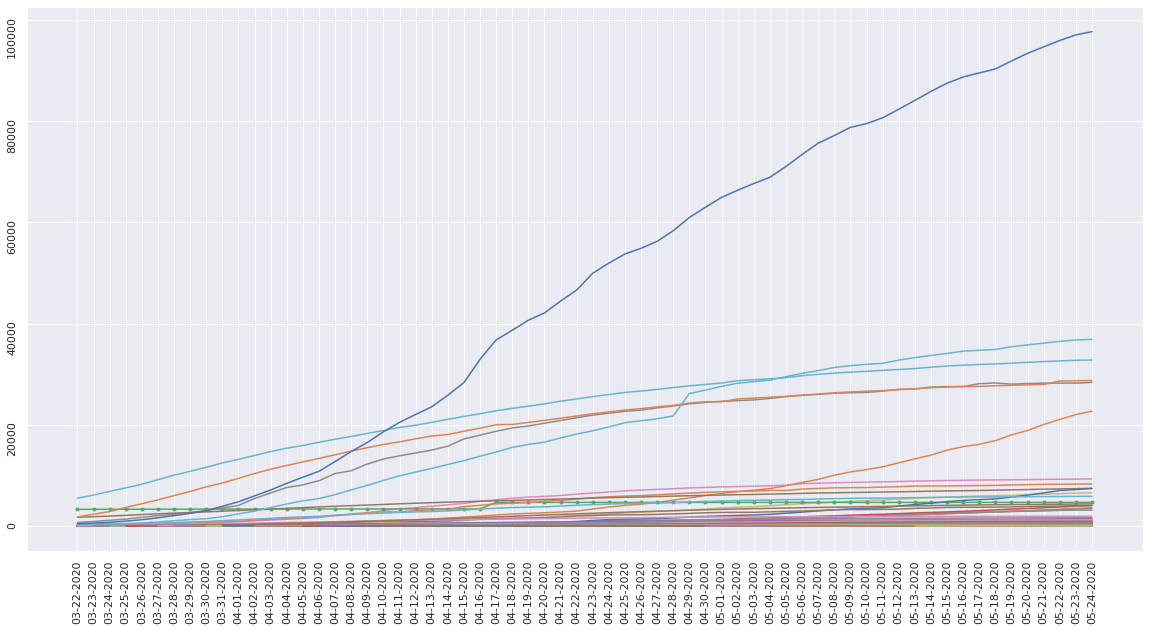

In [223]:
plt.figure(figsize=(20,10))
for x in deaths:
    if x == 'China':
        plt.plot(deaths[x],marker='.')
    else:
        plt.plot(deaths[x],label=x)
#plt.legend()
plt.tick_params(labelrotation=90)